In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import os
matplotlib.rcParams['font.size'] = 12
plt.rcParams.update({'figure.figsize':[18,6]})
from matplotlib import cm
import sys
import pyhsmm
from pyhsmm.util.general import rle
import pyhsmm.basic.distributions as distributions
from scipy.stats import entropy

sys.path.append('/home/kirilman/Projects/nir/main nir')
import sequence_generator as generator

In [2]:
pyhsmm

<module 'pyhsmm' from '/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/__init__.py'>

Конструктор


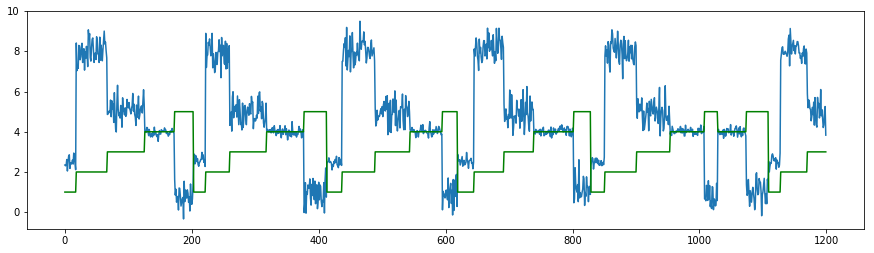

In [3]:
dur_distns = []

trans_matrix = np.array([[0.99, 0.01, 0.0, 0.0, 0.0],
                         [0.02,  0.9,  0.08, 0.0, 0.0],
                         [0.02, 0.0,  0.85, 0.13, 0.0],
                         [0.0,  0.0,  0.0, 0.9, 0.1],
                         [0.08,  0.0,  0.0, 0.02, 0.9]])

Nmax = 5
#     L = 5
#     obs_hypparams = {'alpha_0':np.zeros(L)+0.1,
#                     'K':L,
#                      'alphav_0':np.zeros(L)+0.1, 
#                      'alpha_mf':np.zeros(L)+0.1,
#                     }
obs_distns = []
#{1}
obs_hypparams = {'mu':np.array([[2.5]]),
                'sigma':np.array([[0.2**2]]),
                'kappa_0':0.3,
                'nu_0':2}
obs_distns +=[distributions.Gaussian(**obs_hypparams)]
#{2}
obs_hypparams = {'mu':np.array([[8]]),
                'sigma':np.array([[0.5**2]]),
                'kappa_0':0.3,
                'nu_0':2}
obs_distns +=[distributions.Gaussian(**obs_hypparams)]
#{3}
obs_hypparams = {'mu':np.array([[5]]),
                'sigma':np.array([[0.5**2]]),
                'kappa_0':0.3,
                'nu_0':2}
obs_distns +=[distributions.Gaussian(**obs_hypparams)]
#{4}
obs_hypparams = {'mu':np.array([[4]]),
                'sigma':np.array([[0.15**2]]),
                'kappa_0':0.3,
                'nu_0':2}
obs_distns +=[distributions.Gaussian(**obs_hypparams)]
#{5}
obs_hypparams = {'mu':np.array([[1]]),
                'sigma':np.array([[0.5**2]]),
                'kappa_0':0.3,
                'nu_0':2}

obs_distns +=[distributions.Gaussian(**obs_hypparams)]

dur_hypparams = {'lmbda': 20,
                 'alpha_0':1,
                 'beta_0':1}
dur_distns +=[distributions.PoissonDuration(**dur_hypparams)]

dur_hypparams = {'lmbda': 45,
                 'alpha_0':1,
                 'beta_0':1}
dur_distns +=[distributions.PoissonDuration(**dur_hypparams)]

dur_hypparams = {'lmbda': 50,
                 'alpha_0':1,
                 'beta_0':1}
dur_distns +=[distributions.PoissonDuration(**dur_hypparams)]

dur_hypparams = {'lmbda':50,
                 'alpha_0':1,
                 'beta_0':1}
dur_distns +=[distributions.PoissonDuration(**dur_hypparams)]

dur_hypparams = {'lmbda':30,
                 'alpha_0':1,
                 'beta_0':1}

dur_distns +=[distributions.PoissonDuration(**dur_hypparams)]

#     posteriormodel = pyhsmm.models.WeakLimitHDPHSMM(
#             alpha=6.,gamma=2., # better to sample over these; see concentration-resampling.py
#             init_state_concentration=6., # pretty inconsequential
#             obs_distns=obs_distns,
#             dur_distns=dur_distns)

model = pyhsmm.models.HSMM(
        alpha=0., # На что влияет 
#             gamma=2., # better to sample over these; see concentration-resampling.py
#         init_state_concentration=., # pretty inconsequential
        obs_distns=obs_distns,
        dur_distns=dur_distns,trans_matrix = trans_matrix,
        pi_0 = np.array([1.00, 0.00, 0.0, 0.0, 0.0]))
# model.resample_model()
# model.init_state_distn.pi_0 = [0.99, 0.01, 0.0 ]
# print(model.init_state_distn.pi_0)
# posteriormodel.add_data(data) # duration truncation speeds things up when it's possible
fig = plt.figure(figsize=(15,4))
signal, stateseq = model.generate(1200)
plt.plot(signal)
plt.plot(stateseq+1,'g')

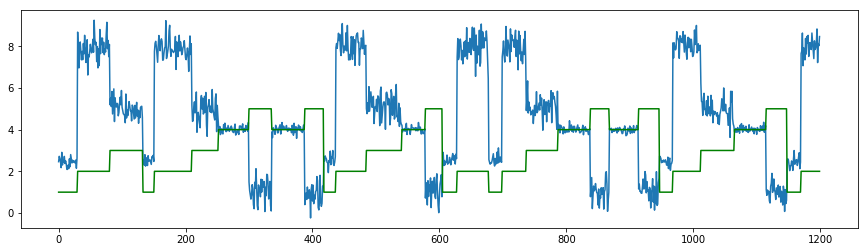

In [24]:
fig = plt.figure(figsize=(15,4))
signal, stateseq = model.generate(1200)
plt.plot(signal)
plt.plot(stateseq+1,'g')

In [11]:
model.states_list[0].pi_0

array([1., 0., 0., 0., 0.])

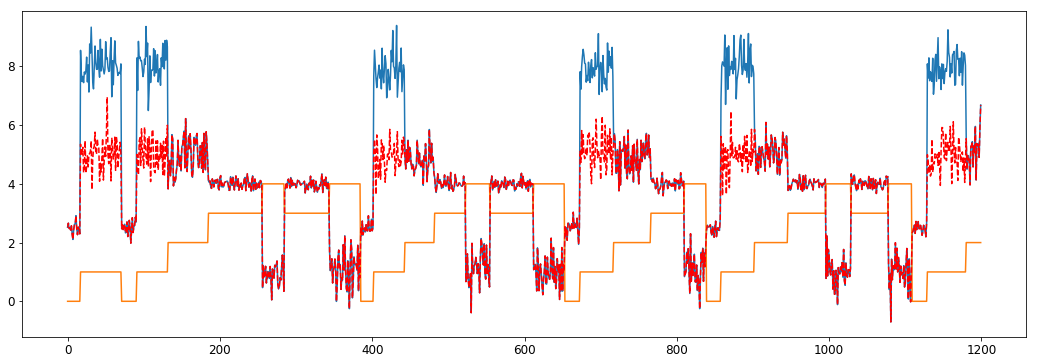

In [60]:
signal_generator = generator.Sequence(1200,type='model', hsmm_model = model)
s = signal_generator.sequence
p = signal_generator.stateseq
plt.plot(s)
plt.plot(p)
an_signal = signal_generator.get_abnormal(dtype='chain_violation',state = 1, state_update=2)
plt.plot(an_signal,'r--')

In [61]:
def plot_stateseq(x_, stateseq, draw_stateseq = True):
    plt.figure(figsize=(16,3.5),dpi = 100)
    colors = ['#F1C40F','#2ECC71','#837051','#C0392B','#A569BD','#3498DB','#00FC6B','#C0392B','#837051']
    plt.plot(x_,'green')
    ymin = np.min(x_) - 0.5
    ymax = np.max(x_) + 0.5
    plt.ylim(ymin, ymax)
    plt.xlim(0,len(stateseq))
    if draw_stateseq == True:
        plt.plot(stateseq+1,'r')
    states, pos = rle(stateseq)
    positions = np.cumsum(pos)
    one = 0
    for state,start,end in zip(states[1:], positions, positions[1:]):
        if one == 0:
            plt.fill_between(x = np.arange(0,positions[0]+1),y1 = ymin, y2 = ymax,color=colors[states[0]], alpha = 0.8)
            one == 1
        plt.fill_between(x = np.arange(start,end+1),y1 = ymin, y2 = ymax,color=colors[state], alpha = 0.8)
    plt.xticks(np.arange(0,len(signal)+1,50))
    return

In [62]:
for s in model.used_states:
    print(s,' ',model.obs_distns[s].params, model.dur_distns[s].params)

0   {'mu': array([[2.5]]), 'sigma': array([[0.04]])} {'lmbda': 20}
1   {'mu': array([[8]]), 'sigma': array([[0.25]])} {'lmbda': 45}
2   {'mu': array([[5]]), 'sigma': array([[0.25]])} {'lmbda': 50}
3   {'mu': array([[4]]), 'sigma': array([[0.0225]])} {'lmbda': 50}
4   {'mu': array([[1]]), 'sigma': array([[0.25]])} {'lmbda': 30}


In [69]:
def create_anomal(signal, stateseq, state, distribution, output = False):
    states, pos = rle(stateseq)
    print(pos)
    positions = np.cumsum(pos)
    index = np.where(states == state)[0][-2:]
    print(type(index))
    print('pos ',positions,'len = ', len(positions))
    print('ind',index)
    
    for it, inx in enumerate(index):
        if it == 0:
            indexs = np.arange(positions[inx - 1], positions[inx])
        else:
            indexs = np.concatenate((indexs,np.arange(positions[inx - 1], positions[inx])))
    return indexs
#     if index == None:
#         print('Пустой')
#     a = positions[index - 1]
#     b = positions[index]
#     if output:
#         print(a,b)
#     anomal_signal = signal.copy()
#     anomal_signal[a:b] = distribution.rvs(b-a).reshape(-1)    
#     return anomal_signal

In [70]:
anomal_signal = create_anomal(signal, stateseq, 1 , model.obs_distns[4])
anomal_signal

[19 35 58 65 23 60 35 25 46 48 48 40 27 38 49 44 33 64 27 20 50 57 49 25
 19 53 56 64 23]
<class 'numpy.ndarray'>
pos  [  19   54  112  177  200  260  295  320  366  414  462  502  529  567
  616  660  693  757  784  804  854  911  960  985 1004 1057 1113 1177
 1200] len =  29
ind [20 25]


array([ 804,  805,  806,  807,  808,  809,  810,  811,  812,  813,  814,
        815,  816,  817,  818,  819,  820,  821,  822,  823,  824,  825,
        826,  827,  828,  829,  830,  831,  832,  833,  834,  835,  836,
        837,  838,  839,  840,  841,  842,  843,  844,  845,  846,  847,
        848,  849,  850,  851,  852,  853, 1004, 1005, 1006, 1007, 1008,
       1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019,
       1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030,
       1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041,
       1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052,
       1053, 1054, 1055, 1056])

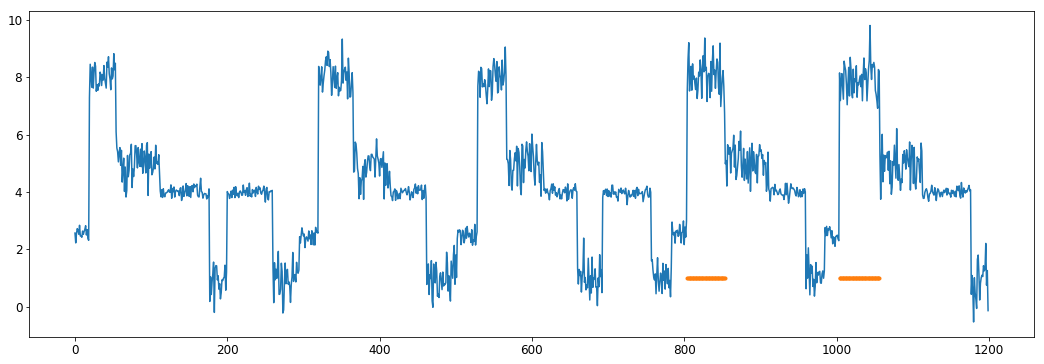

In [71]:
plt.plot(signal)
plt.plot(anomal_signal,[1]*len(anomal_signal),'.')

In [49]:
model.states_list[0].pi_0

array([1., 0., 0., 0., 0.])

In [50]:
plot_stateseq(signal, stateseq)
plt.plot(anomal_signal,'r--')

NameError: name 'plot_stateseq' is not defined

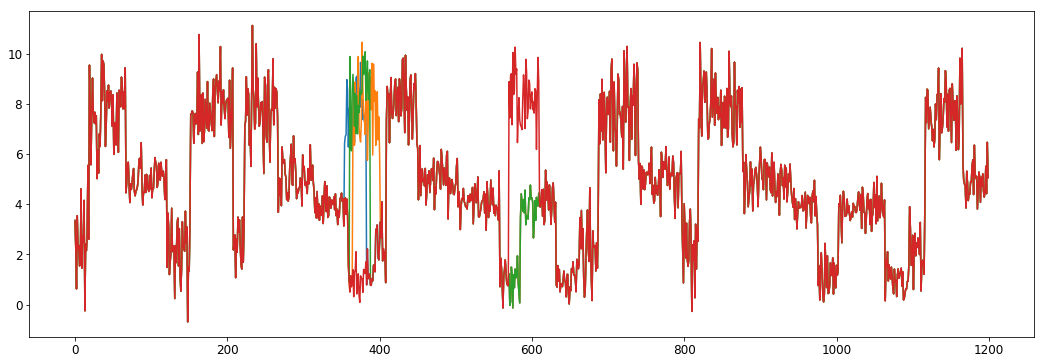

In [57]:
for i in range(200):
    t,stateseq = model.generate(1000)
#     print(stateseq)
    anomal_signal = create_anomal(signal, stateseq, 4 , model.obs_distns[1])
    if i % 50==0:
        plt.plot(anomal_signal)

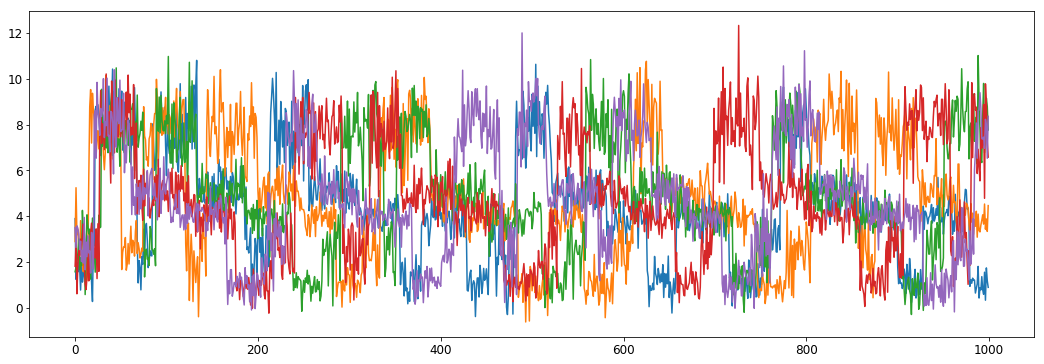

In [39]:
for i in range(5):
    signal,stateseq = model.generate(1000)
    plt.plot(signal)

In [12]:
ll = []
ll_anomal = [] 
anomal_signals = []; n_signals = []
for i in range(50):
    signal,stateseq = model.generate(800)
    n_signals += [signal]
    anomal_signal = create_anomal(signal, stateseq, 1 , model.obs_distns[4])
#     anomal_signal = create_anomal(anomal_signal, stateseq, 2 , model.obs_distns[0])
    anomal_signals +=[anomal_signal]
    ll +=[model.log_likelihood(signal.reshape(-1,1))]
    ll_anomal +=[ model.log_likelihood(anomal_signal.reshape(-1,1))]

/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:512: RuntimeWarning: divide by zero encountered in log
  self._normalizer = logsumexp(np.log(self.pi_0) + betastarl[0])


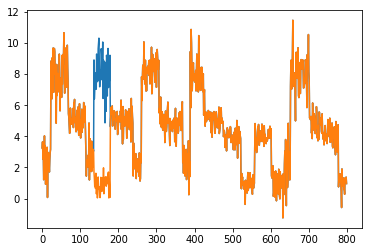

In [13]:
plt.plot(signal)
plt.plot(anomal_signal)

In [14]:
anomal_signal = create_anomal(signal, stateseq, 1 , model.obs_distns[4], True)

136 179


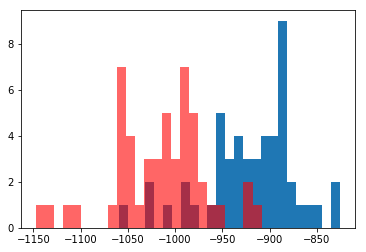

In [15]:
fig = plt.figure(figsize=(6,4))
plt.hist(ll,25);
plt.hist(ll_anomal,25,color='red', alpha = 0.6);

In [16]:
for i in range(20):
    print(model.log_likelihood(np.random.normal(loc = i, size=1500).reshape(-1,1)))
print('Normal ',model.log_likelihood(signal.reshape(-1,1)))

/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))


-7918.17288381542
-4711.059254967069
-4255.161227085086
-4030.2778756004805
-4019.7161968017126
-3654.903596506865
-4440.107725382325
-3387.1553175798263
-2807.441773271702
-3571.1568699251216
-5481.25326646135
-8675.905423565593
-13077.713203848301
-18696.739785858656
-25888.572717375733
-33775.268351961124
-42992.77833855733
-53794.435164215916
-65821.04251724468
-78948.4277330893
Normal  -954.1144573741054


/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:512: RuntimeWarning: divide by zero encountered in log
  self._normalizer = logsumexp(np.log(self.pi_0) + betastarl[0])


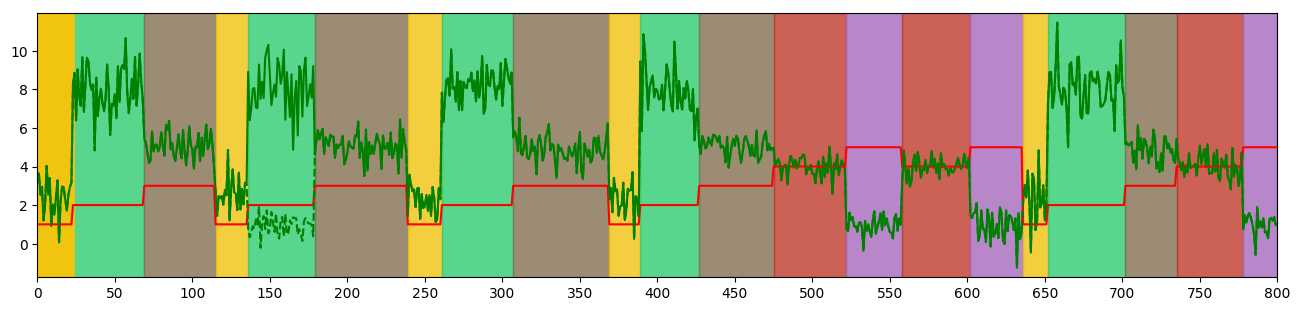

In [17]:
plot_stateseq(signal, stateseq)
plt.plot(anomal_signal,'g--')

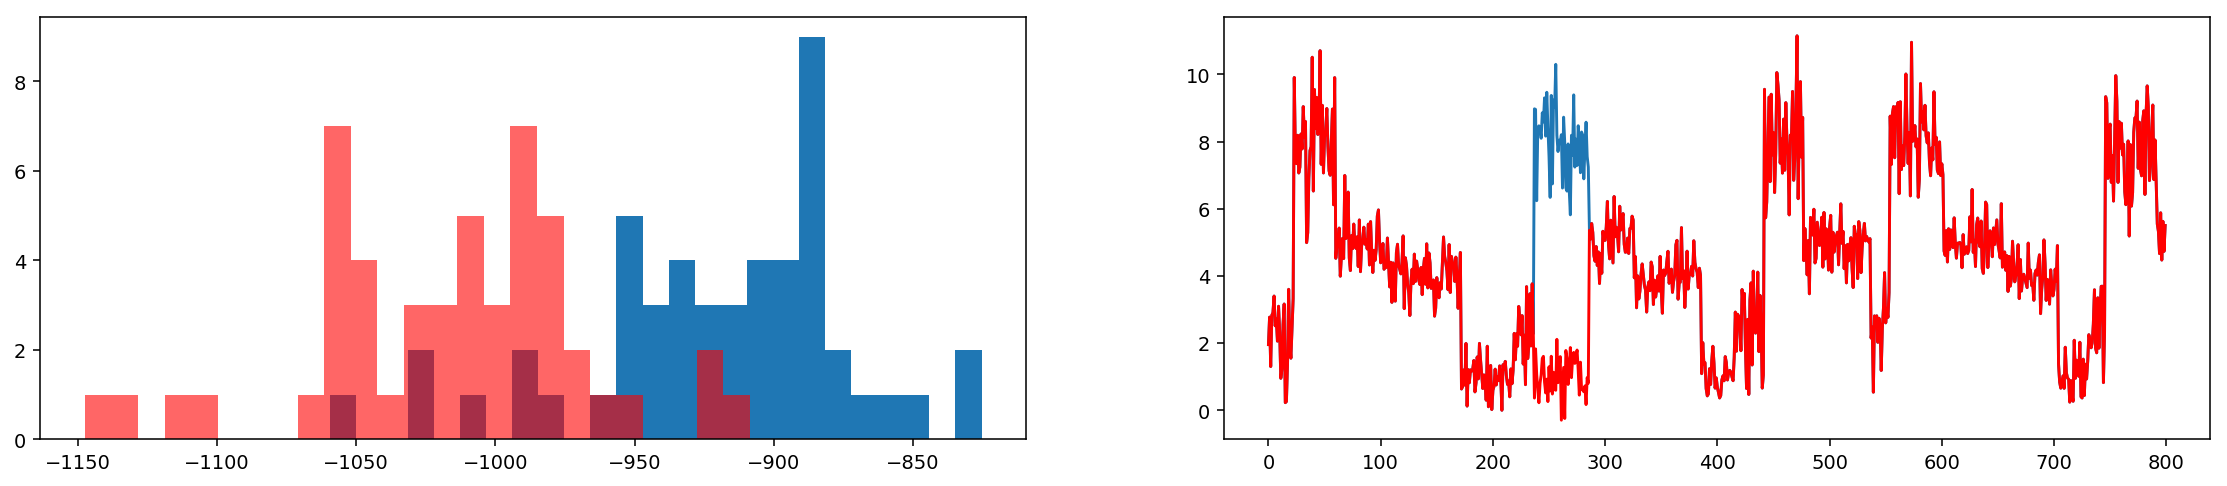

In [18]:
k = 25
# fig = plt.figure(figsize=(4,1))
fig, ax = plt.subplots(1,2, figsize = (20,4), dpi = 140)
ax[0].hist(ll,25);
ax[0].hist(ll_anomal,25,color='red', alpha = 0.6);
ax[1].plot(n_signals[k])
ax[1].plot(anomal_signals[k],'r')

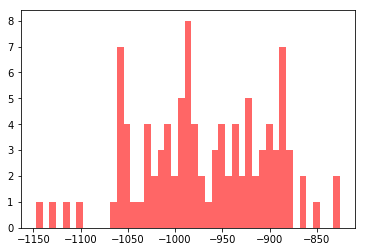

In [19]:
fig = plt.figure(figsize=(6,4))

plt.hist(np.concatenate((ll, ll_anomal)),45,color='red', alpha = 0.6);

/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:512: RuntimeWarning: divide by zero encountered in log
  self._normalizer = logsumexp(np.log(self.pi_0) + betastarl[0])


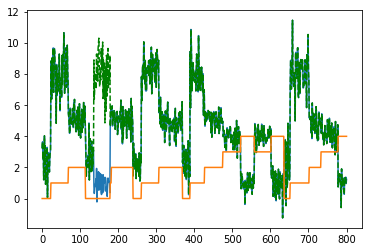

In [20]:
pred, y_pred = model.predict(anomal_signal.reshape(-1,1),1)
plt.plot(pred)
plt.plot(signal,'g--')
plt.plot(y_pred)

/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:347: RuntimeWarning: divide by zero encountered in log
  self.trans_potentials, np.log(self.pi_0),
/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:92: RuntimeWarning: divide by zero encountered in log
  self._log_trans_matrix = np.log(self.trans_matrix)
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:512: RuntimeWarning: divide by zero encountered in log
  self._normalizer = logsumexp(np.log(self.pi_0) + betastarl[0])


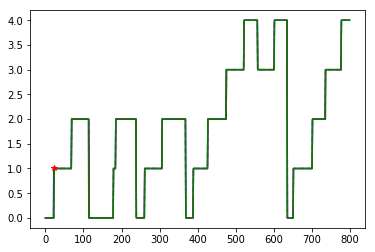

In [21]:
path_vit = model.heldout_viterbi(anomal_signal.reshape(-1,1))
path_pred = model.predict(anomal_signal.reshape(-1,1),1)[1]
pred = model.predict(anomal_signal.reshape(-1,1),1)[1]
plt.plot(path_vit,'blue')
plt.plot(path_pred,'r--')
plt.plot(pred,'green')
plt.plot(np.where(path_vit!= path_pred[:-1],1,None),'r*')

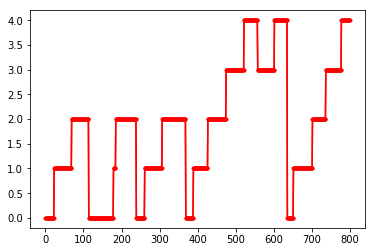

In [22]:
plt.plot(pred,'r',linewidth = 1.5)
plt.plot(pred,'r',linewidth = 1.5,marker = '.')

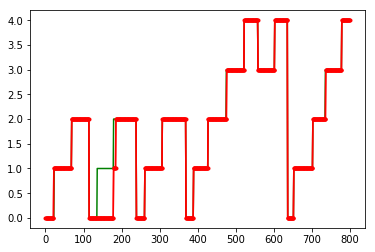

In [23]:
plt.plot(stateseq,linewidth = 1.5, color = 'green')
# plt.plot(path_pred,'r',linewidth = 1.5)
plt.plot(path_vit,'r',linewidth = 1.5)
plt.plot(path_vit,'r',linewidth = 1.5,marker = '.')

/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:512: RuntimeWarning: divide by zero encountered in log
  self._normalizer = logsumexp(np.log(self.pi_0) + betastarl[0])


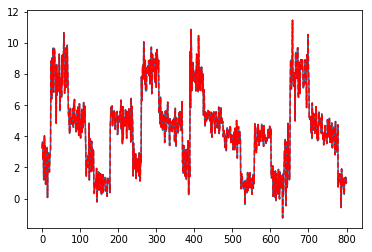

In [24]:
t_, s_ = model.predict(anomal_signal.reshape(-1,1),1)
plt.plot(t_)
plt.plot(anomal_signal,'r--')

In [25]:
model.add_data(n_signals[0].reshape(-1,1))
log = model.states_list.pop().messages_backwards_python()
print(len(log))
log[1].shape

/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:237: RuntimeWarning: divide by zero encountered in log
  np.log(self.pi_0),
/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:92: RuntimeWarning: divide by zero encountered in log
  self._log_trans_matrix = np.log(self.trans_matrix)


2


(800, 5)

/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:237: RuntimeWarning: divide by zero encountered in log
  np.log(self.pi_0),
/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:92: RuntimeWarning: divide by zero encountered in log
  self._log_trans_matrix = np.log(self.trans_matrix)


2


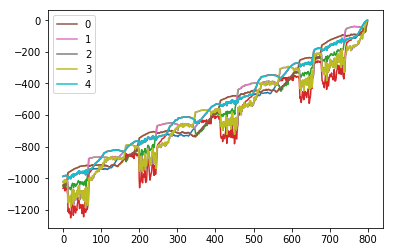

In [26]:
model.add_data(n_signals[0].reshape(-1,1))
log = model.states_list.pop().messages_backwards_python()
print(len(log))
log[1].shape

for l in log[1].T:
    plt.plot(l)
for j,l in enumerate(log[0].T):
    plt.plot(l,label = str(j))
plt.legend()

/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:227: RuntimeWarning: divide by zero encountered in log
  np.log(self.pi_0),
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:92: RuntimeWarning: divide by zero encountered in log
  self._log_trans_matrix = np.log(self.trans_matrix)


2   (800, 5)   (800, 5)


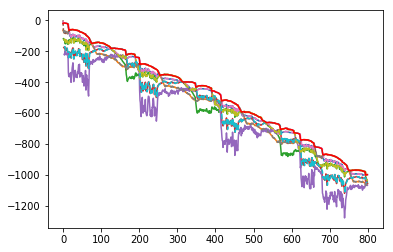

In [27]:
model.add_data(n_signals[0].reshape(-1,1))
forward = model.states_list.pop().messages_forwards()
print(len(forward), ' ', forward[0].shape,' ', forward[1].shape)
for k,f in enumerate(forward[0].T):
    plt.plot(f,label=str(k))
for k,f in enumerate(forward[1].T):
    plt.plot(f,'--',label=str(k))
plt.plot(forward[0].max(axis = 1),'red')

In [28]:
p = [0.1, 0.2, 0.3, 0.001]
q = [0.1, 0.2, 0.3, 0.111]
kullback_divergence(p,q)

NameError: name 'kullback_divergence' is not defined

In [ ]:
def get_kullback_divergence(model, normal, anomal):
    model.add_data(normal.reshape(-1,1))
    f = model.states_list.pop().messages_forwards()[0]
    normal_p = f.max(axis = 1)
    normal_p = normal_p/normal_p.sum()
    
    model.add_data(anomal.reshape(-1,1))
    f = model.states_list.pop().messages_forwards()[0]
    test_p = f.max(axis = 1)
    test_p = test_p/test_p.sum()
    return kullback_divergence(normal_p, test_p)    

In [ ]:
def kullback_divergence(p,q):
    if isinstance(p,list):
        p = np.array(p)
        q = np.array(q)
    p[np.where(p == 0)] = 1E-10; q[np.where(q == 0)] = 1E-10
    return entropy(p,q)
model.add_data(n_signals[0].reshape(-1,1))
f = model.states_list.pop().messages_forwards()[0]
normal_p = f.max(axis=1)

model.add_data(anomal_signals[0].reshape(-1,1))
f = model.states_list.pop().messages_forwards()[0]
test_p = f.max(axis = 1)
print(normal_p[-10:])
print(test_p[-10:])

print(kullback_divergence(normal_p, test_p))
print(kullback_divergence(normal_p, normal_p))

In [ ]:
model.add_data(n_signals[2].reshape(-1,1))
alpha, alpha_n = model.states_list.pop().messages_forwards()

alpha = alpha.max(axis = 1)
alpha = np.diff(alpha)
# plt.plot(np.exp(alpha),'--',color='blue')
plt.plot(alpha,'--',color='blue')


model.add_data(n_signals[0].reshape(-1,1))
alpha, alpha_n = model.states_list.pop().messages_forwards()
alpha = alpha.max(axis = 1)
alpha = np.diff(alpha)
# plt.plot(np.exp(alpha))
plt.plot(alpha)

model.add_data(anomal_signals[0].reshape(-1,1))
alpha, alpha_n = model.states_list.pop().messages_forwards()
alpha = alpha.max(axis = 1)
alpha = np.diff(alpha)

# plt.plot(np.exp(alpha),'g')
plt.plot(alpha)

In [ ]:
model.add_data(n_signals[0].reshape(-1,1))
f = model.states_list.pop().messages_forwards()[0]
normal_p = f.max(axis=1)

model.add_data(anomal_signals[24].reshape(-1,1))
f = model.states_list.pop().messages_forwards()[0]
test_p = f.max(axis = 1)
print(entropy(normal_p, test_p))

# plt.hist(normal_p, 50)
# plt.hist(test_p, 50)
plt.hist(np.diff(normal_p), 100,color='red');
plt.hist(np.diff(test_p), 100);

model.add_data(n_signals[0].reshape(-1,1))
f = model.states_list.pop().messages_forwards()[1]
normal_p = f.max(axis=1)

model.add_data(anomal_signals[0].reshape(-1,1))
f = model.states_list.pop().messages_forwards()[1]
test_p = f.max(axis = 1)

print(entropy(normal_p, test_p))


In [ ]:
model.add_data(n_signals[0].reshape(-1,1))
f = model.states_list.pop().messages_forwards()[0]
normal_p = f.max(axis=1)
plt.plot(normal_p)

model.add_data(n_signals[0].reshape(-1,1))
log = model.log_likelihood(n_signals[0].reshape(-1,1))

model.add_data(n_signals[0].reshape(-1,1))
backward = model.states_list.pop().messages_backwards()[0]
backward = backward.max(axis=1)
# print(normal_p)
# print(backward)
# print(log)

In [ ]:
model.add_data(n_signals[0].reshape(-1,1))
backward = model.states_list.pop().messages_backwards()
plt.plot(backward[0])
plt.plot(backward[1],'g--')

### Расчет DL

In [ ]:
d = []
d_test = []
for i in range(len(n_signals)):
    d+=[get_kullback_divergence(model, n_signals[i], anomal_signals[i])]
    model.add_data(n_signals[i].reshape(-1,1))
    f = model.states_list.pop().messages_forwards()[0]
    normal_p = f.max(axis=1)
    model.add_data(anomal_signals[i].reshape(-1,1))
    f = model.states_list.pop().messages_forwards()[0]
    test_p = f.max(axis = 1)
    d_test+=[entropy(normal_p, test_p)]

In [ ]:
plt.hist(d,50,color='blue');
plt.hist(d_test,50,alpha=0.5,color='red');

In [ ]:
entropy( 0 , 1)

In [ ]:
entropy(np.array([0.12]), np.array([1]))

In [ ]:
DL = []
DL_abnorm = []
DL_one = []
DL_entropy = []
L = len(n_signals[0])
for anomal, normal in zip(n_signals, anomal_signals):
    ll_normal = model.log_likelihood(normal.reshape(-1,1))
    ll_anomal = model.log_likelihood(anomal.reshape(-1,1))
    DL +=[ (ll_normal - ll_anomal)/ L ]
    DL_abnorm +=[ (ll_normal - ll_anomal)]
    
    ll_one = model.log_likelihood(n_signals[0].reshape(-1,1))
    DL_one +=[ (ll_one - ll_anomal)/ L]
    DL_entropy+=[entropy(np.array([ll_one]),np.array( [ll_anomal]))]

In [ ]:
entropy(np.array([ll_one]),np.array( [ll_anomal]))
# entropy(ll_one, ll_anomal)

In [ ]:
ll_one* np.log(ll_one/ll_anomal)

In [ ]:
fig, ax =plt.subplots(2,2, dpi = 120, figsize = (5,4))
ax[0,0].hist(DL, 20);
ax[0,1].hist(DL_abnorm, 20);
ax[1,0].hist(DL_one, 20);
ax[1,1].hist(DL_entropy,20)
plt.tight_layout()

In [ ]:
d = []
for i in range(len(n_signals)):
    d+=[get_kullback_divergence(model, n_signals[i], anomal_signals[i])]
plt.hist(d,50);

In [ ]:
norm_d = []
for i in range(len(n_signals)):
    norm_d+=[get_kullback_divergence(model, n_signals[0], n_signals[i])]

In [ ]:
plt.hist(norm_d,50);
plt.hist(d,50,color='r',alpha = 0.5);

In [ ]:
x1,y1 = model.generate(800)
plt.plot(x1)
plt.plot(n_signals[0],'black')

In [ ]:
x1_test = x1 + 0.0015*np.arange(len(x1))
plt.plot(x1_test)
plt.plot(x1)
print("{}, {}".format(model.log_likelihood(x1.reshape(-1,1)), model.log_likelihood(x1_test.reshape(-1,1))))

In [ ]:
model.add_data(n_signals[0].reshape(-1,1))
alpha, alpha_norm = model.states_list.pop().messages_forwards()
f, ax = plt.subplots(2,1)
ax[0].plot(alpha)
ax[1].plot(alpha_norm)

In [ ]:
# plt.plot(alpha)
y_pred = model.predict(n_signals[0].reshape(-1,1),timesteps=1)[1]
plt.plot(alpha/30,'--')
plt.plot(y_pred[:]*(-10),'black')

In [ ]:
alpha = np.where(alpha == -np.inf, -1, alpha)
# plt.plot(alpha)
alpha_diff = np.diff(alpha)
# plt.plot(alpha_diff)
alpha_max = alpha.max(axis = 1)
alpha_max_diff = np.diff(alpha_max)
plt.plot(np.exp(alpha_max_diff))

In [ ]:
a = np.array([[2,3,4],[2,241,2],[5,0,1]])
a.sum(axis = 0)

In [ ]:
k = False
if not k:
    print(2)

In [ ]:
np.cumsum(a[::-1],axis=0)[::-1]

In [ ]:
a[::-1].cumsum(1)

In [ ]:
entropy(alpha_max_diff, alpha_max)

In [ ]:
model.log_likelihood(n_signals[0].reshape(-1,1))

In [ ]:
model

In [ ]:
model.states_list[0]

In [ ]:
import pomegranate as pg

In [ ]:
chain = pg.MarkovChain.from_samples([stateseq])
chain.log_probability(y_pred)

In [ ]:
chain.log_probability([0,1,1,4])

In [ ]:
from scipy.stats import norm
mu = 10; sigma = 1.5
dist = distributions.Gaussian(mu = np.array([[mu]]), sigma = np.array([[sigma**2]]),)
sample = dist.rvs(10000)
plt.hist(sample,20, density = True);
density = norm(loc= mu,scale = sigma)
x = np.linspace(5,15)
plt.plot(x, density.pdf(x),'red')
plt.hist(density.rvs(1000),20,color = 'red', alpha = 0.2, density=True);